In [546]:
import numpy as np
import matplotlib.pyplot as plt

from collections import namedtuple

from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [547]:
def generate_ys(sample_size, randomness=0.5):
    # predicted
    y = np.random.uniform(0, 1, size=sample_size)
    # actual
    Y = [
        x if np.random.uniform(0, 1) >= randomness else np.random.uniform(0, 1) 
        for x in y
    ]
    return np.array(Y).round(), y

In [548]:
def calculate_roc_curve(Y, y, n_threshholds=265):
    
    threshholds = np.linspace(0, 1, n_threshholds)
    
    accuracy = []
    recall = []
    precision = []

    tpr_list = []
    fpr_list = []

    for threshhold in threshholds:
        pred_y = np.array([1 if x >= threshhold else 0 for x in y])

        tn, fp, fn, tp = confusion_matrix(Y, pred_y).ravel()

        tpr = np.nan_to_num(tp / (tp + fn))
        tpr_list.append(tpr)

        fpr = np.nan_to_num(fp / (fp + tn))
        fpr_list.append(fpr)

        accuracy.append(accuracy_score(Y, current_y))
        recall.append(recall_score(Y, current_y))
        precision.append(precision_score(Y, current_y))
        
    return fpr_list, tpr_list, accuracy, recall, precision, threshholds

In [549]:
def plot_roc_curve(fpr, tpr):
    
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', alpha=0.9)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.grid()
    plt.legend()
    plt.show()

In [550]:
# worst case
Y, y = generate_ys(500, randomness=1)

fpr, tpr, *other = calculate_roc_curve(Y, y)

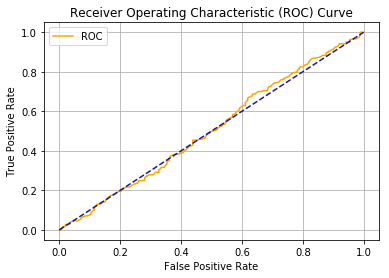

In [551]:
plot_roc_curve(fpr, tpr);

In [552]:
Y, y = generate_ys(500, randomness=0.5)

fpr, tpr, *other = calculate_roc_curve(Y, y)

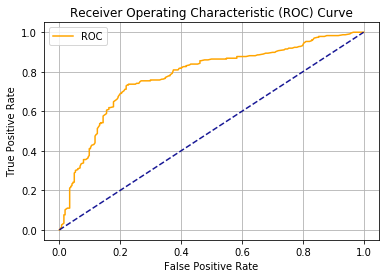

In [553]:
plot_roc_curve(fpr, tpr)

In [554]:
Y, y = generate_ys(500, randomness=0)

fpr, tpr, *other = calculate_roc_curve(Y, y)

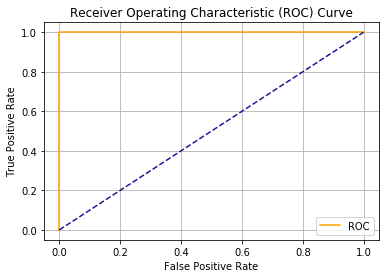

In [555]:
plot_roc_curve(fpr, tpr)